In [1]:
using FFTW
using Plots


1. Zamień sygnał na sumę sygnałów np

x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400) 
Zaobserwuj wynik transformaty i wyjaśnij go.

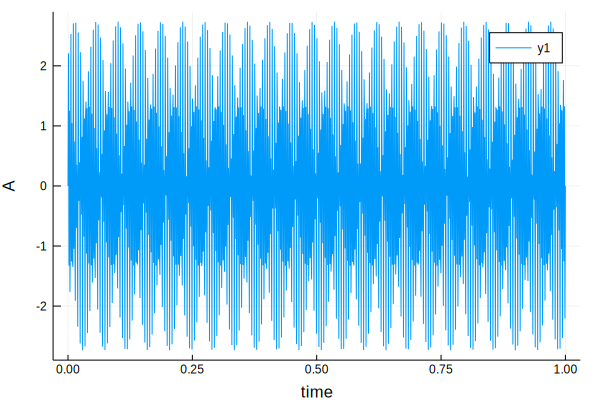

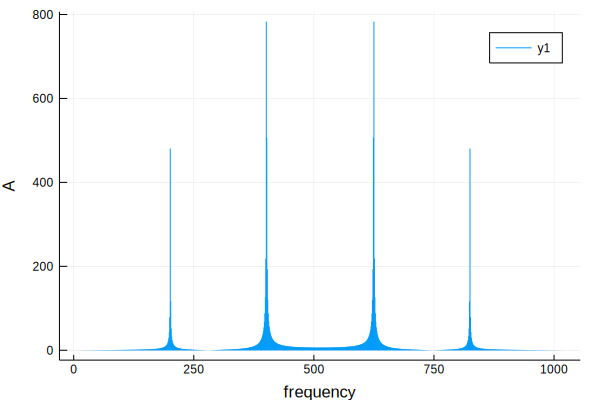

In [2]:
# ex 1

FS=1024 
t =0:1/(FS-1):1
x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400) 
display(plot(t,x,xlabel="time",ylabel="A"))

y = abs.(fft(x))
sticks(y)
xlabel!("frequency")
ylabel!("A")





2.  Usuwanie szumów:

    1. Wypełniamy tablicę wartościami funkcji cosinus ("sygnału") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand().
    2. Prosze narysować wykres zaszumionej funkcji.
    3. Narysować wykres transformaty Fouriera (widmo)  tego sygnału (jak poprzednio).
    4. Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.
    5.Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla <b> częsci  rzeczywistej</b>. Porównać z wejściowym wykresem sygnału.


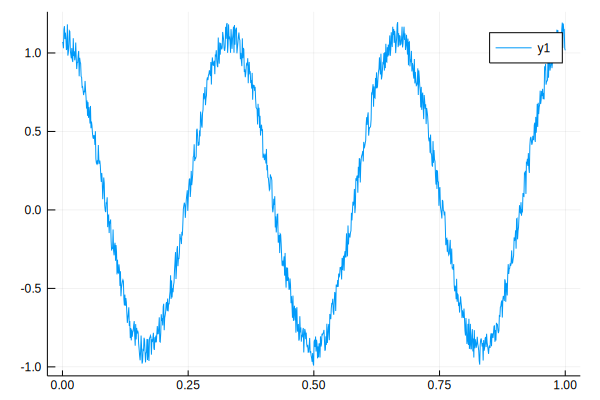

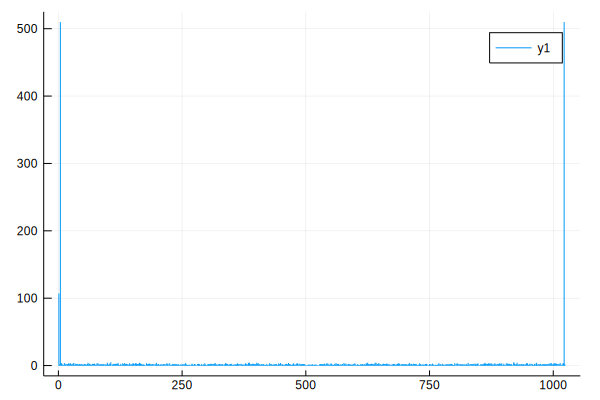

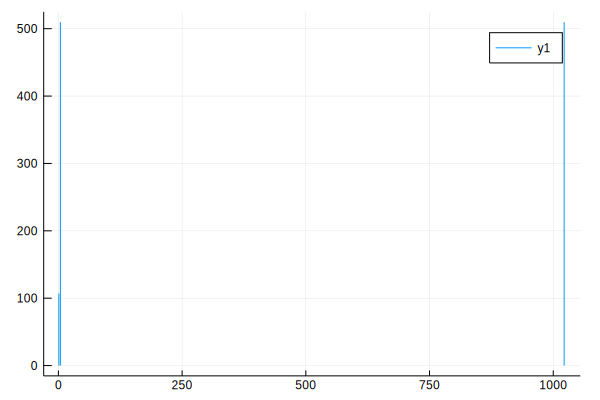

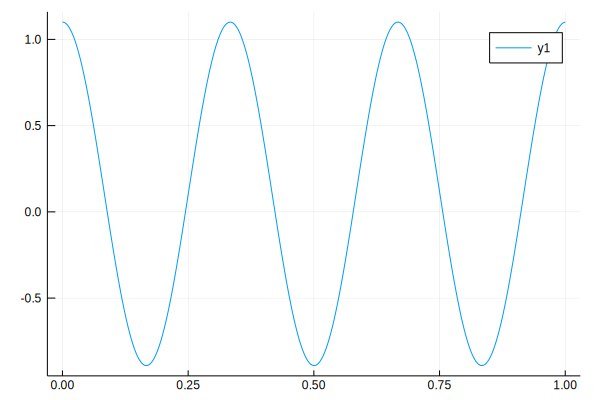

In [3]:
#ex 2
FS=1024    
t =0:1/(FS-1):1
x = cos.(2*pi*t*3)
x = map(v->v+rand()*0.2,x)
display(plot(t,x))

y =abs.(fft(x))
display(sticks(y))
xlabel!("frequency")
ylabel!("A")

for i in 1:length(y)
    if y[i] <50 y[i] =0 end
end
display(sticks(y))


x = ifft(y)
x = map(v->real(v),x)
plot(t,x)


        

3. Proszę nagrać własny glos i zastosować na nim trasformatę Fouriera, narysować wykres widma. Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt.
Przydatne materiały:
     1. <a href="http://samcarcagno.altervista.org/blog/basic-sound-processing-julia/"> Basic sound processing</a>
     2. <a href="https://github.com/dancasimiro/WAV.jl"> Pakiet Wav </a>

In [4]:
using WAV


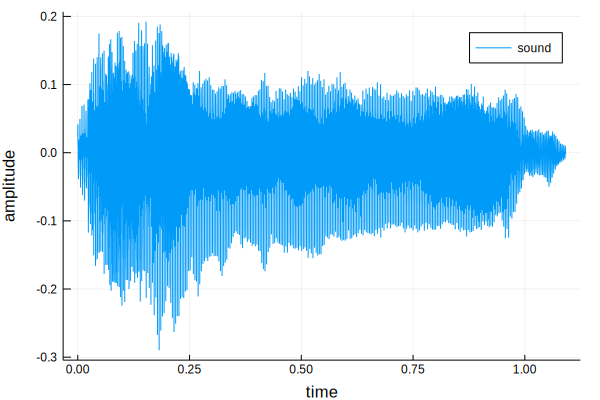

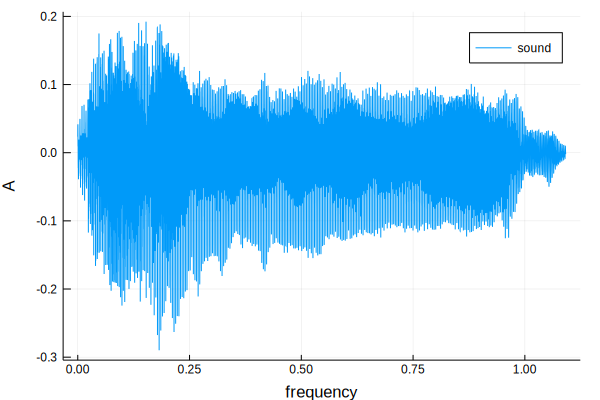

In [5]:
x, fs =wavread("sound.wav") #FS number of samples per second
x = x[:,1]
T =1/fs
t = 0:(length(x)-1)
t = map(x->x*T,t)
wavplay(x,fs)

display(plot(t,x,xlabel="time",ylabel="amplitude",label="sound"))

X = (fft(x))

y =abs.(X)
# display(sticks(y))
xlabel!("frequency")
ylabel!("A")


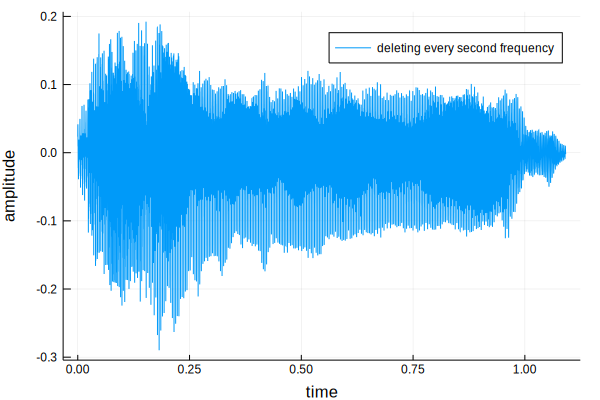

In [6]:
X1=copy(X)
i =1 
while(i<floor(length(X1)/2))
    # deleting every second frequency
    if i%2==1
        X1[i] = 0
        X1[length(X)-i+1] =X1[i]
    end

    i+=1
end

# x = ifft(X1)
x = map(v->real(v),x)
display(plot(t,x,xlabel="time",ylabel="amplitude",label="deleting every second frequency"))
wavplay(x,fs)



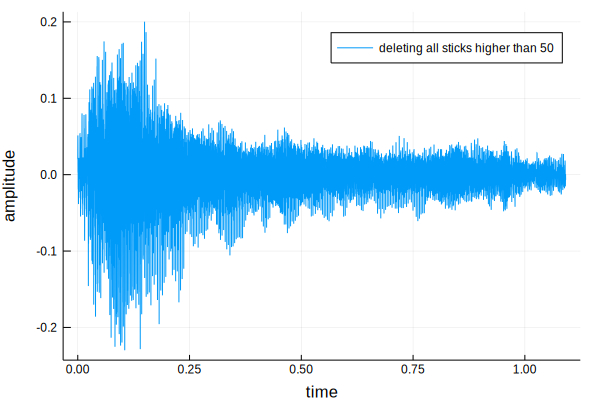

In [7]:
X1=copy(X)
i =1 
while(i<floor(length(X1)/2))

    #"deleting all sticks higher than 50"
    if y[i] >50
        X1[i] = 0
        X1[length(X)-i+1] =X1[i]
    end
    i+=1
end

x = ifft(X1)
x = map(v->real(v),x)
display(plot(t,x,xlabel="time",ylabel="amplitude",label="deleting all sticks higher than 50"))
wavplay(x,fs)


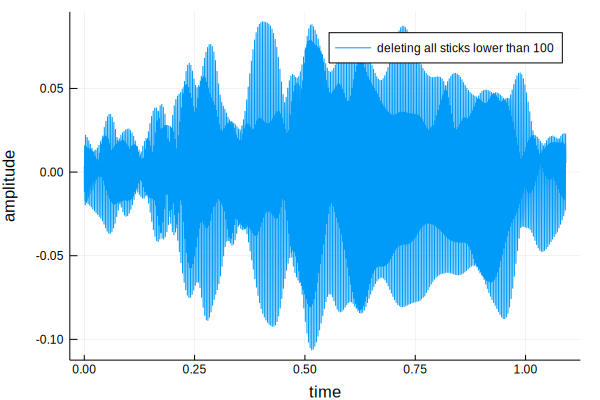

In [8]:
X1 =copy(X)
i =1 
while(i<floor(length(X)/2))

    #deleting all sticks lower than 100
    if y[i] <100
        X[i] = 0
        X[length(X)-i+1] =X[i]
    end
    i+=1
end

x = ifft(X)
x = map(v->real(v),x)
display(plot(t,x,xlabel="time",ylabel="amplitude",label="deleting all sticks lower than 100"))
wavplay(x,fs)